# **Otimização de Processos (COQ897)** 
# *Prof. Argimiro R. Secchi*

$\
$

Primeira Lista de Exercícios - 2020

$\
$

***José Rodrigues Torraca Neto***

$\
$

3) Formule um problema de otimização com restrições de igualdade e
desigualdade de sua área de atuação.

## ***Modelo de Controle Preditivo (MPC) aplicado ao Tennessee Eastman Process (TEP)***

O termo MPC não descreve uma estratégia de controle específica, mas sim qualquer tipo de controle que utiliza um modelo de processo para cálculo do sinal de controle. Em vez de uma custosa computação offline para obter uma lei de controle (𝑢 = 𝑘 (𝑥)), o MPC resolve online um problema de otimização dinâmica com restrições.
Os diferentes métodos de MPC levam a controladores com a mesma estrutura básica e graus de liberdade adequados. Todos os controladores preditivos possuem as seguintes ideias em diferentes graus:
- O uso explícito de um modelo de processo para previsão das saídas do processo.
- O cálculo da sequência de controle que minimiza a função objetivo.
- Receding Horizon Control (RHC)*.

Esses métodos diferem uns dos outros apenas no modelo que usam para descrever o processo e suas perturbações, e a função objetivo a ser minimizada (Camacho, Bordons 2007).

*RHC é um conceito em que o problema de otimização é resolvido em uma série de amostras futuras no intervalo de tempo (t) atual, e a primeira etapa da lei de controle resultante é implementada no sistema. Isso é repetido a cada instante em que o controlador é executado (Park, Lee et al. 1999). A sequência de controle otimizada é uma malha de controle aberta, mas torna-se uma malha fechada porque apenas o primeiro elemento é aplicado e cada novo instante tem novas medições do processo (Seron, Goodwin et al. 2003). [Figura 1]

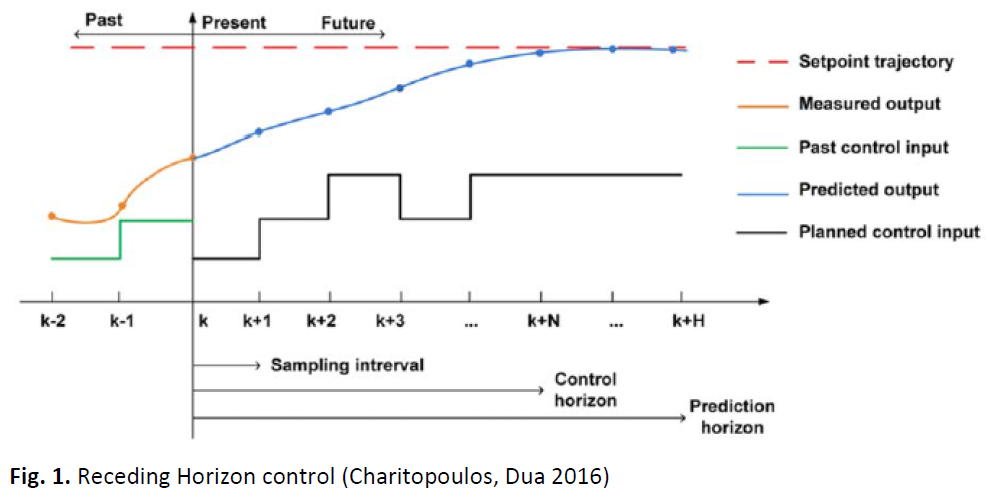

O otimizador é a parte do controlador que calcula as ações de controle futuras. Ele faz isso minimizando a função de custo. No caso de uma função de custo quadrática, o mínimo pode ser encontrado explicitamente como uma função linear da trajetória de referência e entradas/saídas anteriores. Entretanto, em casos com restrições ou não linearidade, a função de custo deve ser minimizada numericamente (Camacho, Bordons 2007). 

O otimizador também precisa contabilizar o erro de predição, que é a diferença entre a saída do processo medido 𝑦 (𝑘)) e a saída predita 𝑦̂ (𝑘). O erro é atualizado em cada cálculo e usado para corrigir previsões futuras (Ogunnaike, Ray 1994).

Diferentes algoritmos MPC usam diferentes funções de custo para obter a lei de controle. O objetivo geral é que a saída futura (y) siga o sinal de referência (w), enquanto o esforço de controle (Δ𝑢) é penalizado. A Equação 1 descreve a forma geral da função de custo (Camacho, Bordons 2007).


>$
J(N_{1},N_{2},N_{3}) = \sum\limits_{j=N_{1}}^{N_{2}} \delta(j)[\hat{y}(t+j|t)-w(t+j)]^2 \ + \sum\limits_{j=1}^{N_{u}} \lambda(j)[\Delta (t+j-1)]^2 \qquad (1)$

onde 𝑁1 e 𝑁2 são os horizontes de custo (mínimo e máximo), 𝑁𝑢 é o horizonte de controle e 𝛿 (𝑗) e 𝜆 (𝑗) são os coeficientes (sequências) que consideram as saídas futuras do processo. Os horizontes de custo definem os limites dos tempos de amostragem onde é vantajoso para a saída coincidir com a referência. Um valor alto de 𝑁1 significa que os primeiros instantes não são importantes, por exemplo, processos com tempo morto ou resposta inversa. O horizonte de custo máximo 𝑁2 sempre tem um valor superior ao horizonte de controle 𝑁𝑢. Os coeficientes podem ser usados, por exemplo, para encontrar um peso exponencial ao longo do horizonte: 𝛿 (𝑗) = 𝛼^(𝑁2 − 𝑗), onde ao escolher um valor para 𝛼 a suavidade ou rigidez do controle pode ser dada (quanto mais os primeiros erros são penalizados , mais rígido será o controle).

A trajetória de referência 𝑤 (𝑡 + 𝑘) também é considerada na função de custo. Esta é uma vantagem do controle preditivo e é especialmente útil nos casos em que a evolução da referência 𝑟 (𝑡 + 𝑘) é conhecida de antemão. Essas aplicações incluem robótica e processos em batelada. Uma melhora perceptível de desempenho também pode ser alcançada nos casos em que a referência é constante, quando o instante da mudança em seu valor é conhecido. A trajetória de referência é geralmente uma aproximação suave da referência em vez da referência real (Camacho, Bordons 2007).


O processo Tennessee Eastman (TEP) foi descrito pela primeira vez por Downs e Vogel (1993) da Eastman Chemical Company. O processo é baseado em um processo industrial real, embora as propriedades como componentes e cinética tenham sido modificadas para o problema de teste. É um benchmark de teste criado para permitir o estudo de uma ampla gama de aplicações, como estratégia de controle de toda a planta, controle multivariável, otimização, controle preditivo, estimativa / controle adaptativo, controle não linear e diagnóstico de processo.
O processo consiste em quatro reações com quatro reagentes (A, C, D, E) e um inerte (B); estes produzem dois produtos (G, H) e um subproduto (F). As reações são:

>A (𝑔) + C (𝑔) + D (𝑔) → G (𝑙𝑖𝑞), Produto 1 $\quad$(1)
>
>A (𝑔) + C (𝑔) + E (𝑔) → H (𝑙𝑖𝑞), Produto 2$\quad$ (2)
>
>A (𝑔) + E (𝑔) → F (𝑙𝑖𝑞), Subproduto $\quad$$\quad$$\quad$(3)
>
>3D (𝑔) → 2F (𝑙𝑖𝑞), Subproduto $\quad$$\quad$$\quad$$\quad\ \ \ \$(4)

As reações são exotérmicas e irreversíveis. A reação eq. 1 tem uma energia de ativação mais alta e, portanto, a produção de G é mais dependente da temperatura. Além disso, em relação às concentrações de reagentes, as reações são aproximadamente de primeira ordem. O processo consiste em cinco operações unitárias: reator, condensador, separador vapor-líquido, compressor de reciclo e stripper de produto (Downs, Vogel 1993). 

A Figura 2 mostra o diagrama do processo. O processo pode ser operado em seis modos com três proporções de massa de produto diferentes (fluxo de produto do separador). Esses modos são descritos na Tabela 1 e os setpoints dos modos 1 e 3 na Tabela 2.



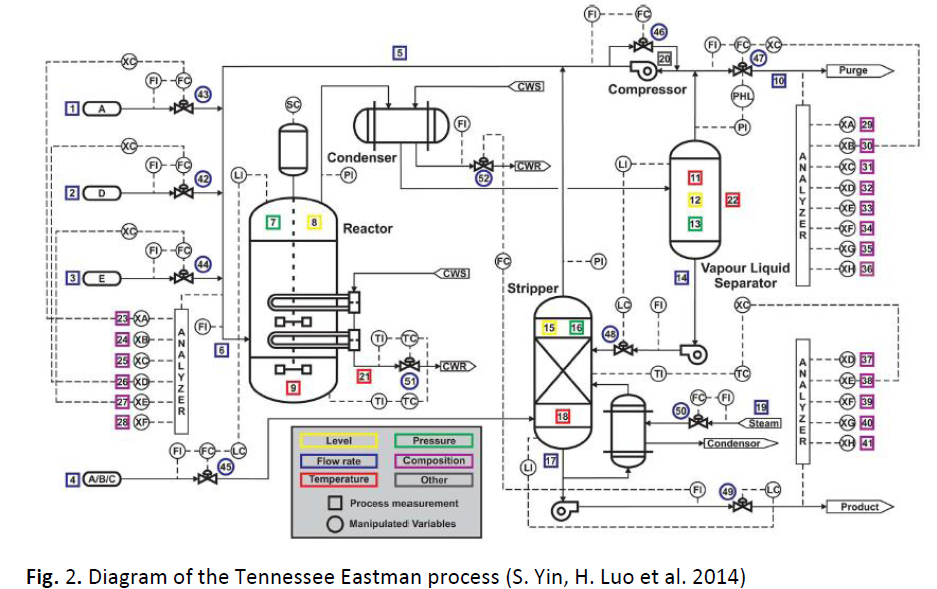

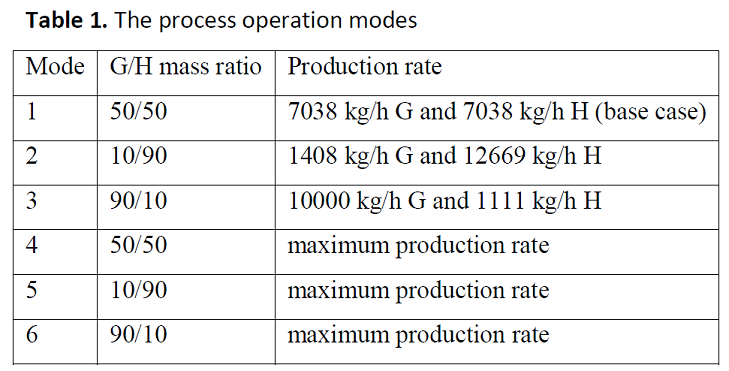

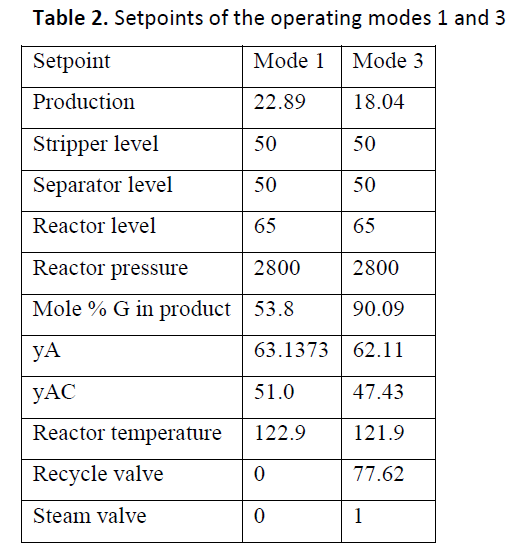

Ricker (1996) projetou uma estratégia de controle descentralizada para o processo TEP. Downs e Vogel (1993) descreveram seis modos de operação. Além disso, Ricker considerou os seguintes pontos:
- A composição do produto deve ficar dentro de ± 5 mol-% do seu setpoint para a quantidade de produto G.
- A taxa de produção deve ficar dentro de ± 5% de seu ponto de ajuste para vazão volumétrica. Alguns modos exigem taxa de produção máxima e o sistema deve ser capaz de levar o processo a pelo menos uma restrição sem violar outras especificações ou limites de desligamento.
- Os estoques de líquidos têm limites especificados. A operação ideal do processo minimiza a quantidade de líquido no reator. Os estoques de separadores e strippers minimizam as variações na taxa de produção e não têm efeito na economia do processo.
- A pressão do reator tem um limite superior de 3 MPa, acima do qual o processo é desligado. No entanto, a operação ideal requer operação perto do limite superior e o sistema deve ser capaz de controlar a pressão.
- Alguns fluxos de alimentação têm disponibilidade limitada, o que causa variabilidade da vazão de alimentação.
- Os estoques de produtos químicos devem ser controlados para evitar o esgotamento ou acúmulo de quaisquer materiais.
- Os analisadores podem estar temporariamente fora de serviço, mas o sistema ainda deve ser capaz de operar.
- Rejeição de perturbações.
- O sistema deve ser capaz de manter uma ***operação ótima***. Minimizando os custos ou maximizando a taxa de produção dependendo do modo de operação
(Ricker 1996).

O processo possui doze graus de liberdade. Com base na lista de metas de controle, pelo menos seis devem ser usados ​​para controlar as seguintes variáveis ​​medidas:
1. taxa de produção,
2. % molar do produto G na corrente do produto,
3. pressão do reator,
4. nível de líquido do reator,
5. nível de líquido do separador e
6. nível do líquido do stripper.

Além disso, a agitação afeta a transferência de calor apenas no reator e, portanto, é fixada em 100% para maximizar o potencial de resfriamento. Como resultado, existem cinco graus de liberdade que devem ser atribuídos de forma adequada (Ricker 1996).

# ***Implementação do MPC***

A proposta deste trabalho é implementar um **MPC linear** aplicado ao benchmark TE, com um modelo **LTI** (Linear Time Invariant) em espaço de estados, obtido via **identificação**. No caso, o modelo LTI será uma representação linear do sistema dinâmico com **tempo discreto**. O MPC será baseado em modelos de entrada-saída (I/O: **input/output**), que serão usados ​​em uma função de supervisão para ajustar os pontos de ajuste dos controles de PI de nível inferior. O MPC pode ser implementado de forma que suas entradas sejam os setpoints constantes (referência) e as medições de processo, e suas saídas sendo os setpoints dados aos controladores PI no nível inferior.

O framework do MPC deve reconhecer modelos numéricos lineares invariantes no tempo (LTI) e modelos identificados (identificação do sistema). Os modelos LTI que podem ser usados ​​devem ser função de transferência, espaço de estados e zero-pole-gain (zpk). O controlador deve usar um sistema de espaço de estados de tempo discreto para realizar todos os cálculos. Portanto, quando um modelo de planta é especificado, o software deve executar as seguintes etapas conforme necessário.
1. Conversão para espaço de estados

2. Discretização ou reamostragem

*   Um modelo de tempo contínuo é convertido para tempo discreto
*   Um modelo de tempo discreto com tempo de amostra diferente é reamostrado


3. Delay removal

4. Conversão para variáveis ​​adimensionais


*   Fatores de escala devem ser especificados


O MPC deve resolver um problema de programação quadrática (**QP**) como um problema de otimização em cada intervalo de controle. O problema QP inclui uma função de custo, restrições e uma decisão. A função de custo é uma medida escalar de desempenho do controlador que é minimizada. As restrições são as condições que a solução deve satisfazer devido aos limites físicos. A decisão são os ajustes às variáveis ​​manipuladas que minimizam a função de custo. 

O MPC então, converte o problema de otimização em um problema geral de QP:

>$
min_x(\frac{1}{2} \ x^{T} \ H \ x \ + \ f^T  x) \qquad (1)$

que está sujeito às restrições de desigualdade linear 𝐴𝑥≥𝑏 onde 𝑥 é o vetor solução, 𝐻 é a matriz Hessiana, 𝐴 é uma matriz de coeficientes de restrição linear e 𝑏 e 𝑓 são vetores. Essa minimização é calculada para cada intervalo de controle.

O framework sugerido para a implementação é baseado na linguagem de programação **python**, utilizando os seguintes pacotes: **toolbox do-mpc** (https://www.do-mpc.com/en/latest/), **GEKKO** (https://gekko.readthedocs.io/en/latest/overview.html), **APMonitor Python** (http://apmonitor.com/wiki/index.php/Main/PythonApp), ou **mpcpy** (https://github.com/BrechtBa/mpcpy). 